In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [2]:
data = pd.read_csv(r"D:\Credit card\archive\creditcard.csv")
df = pd.DataFrame(data)       

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


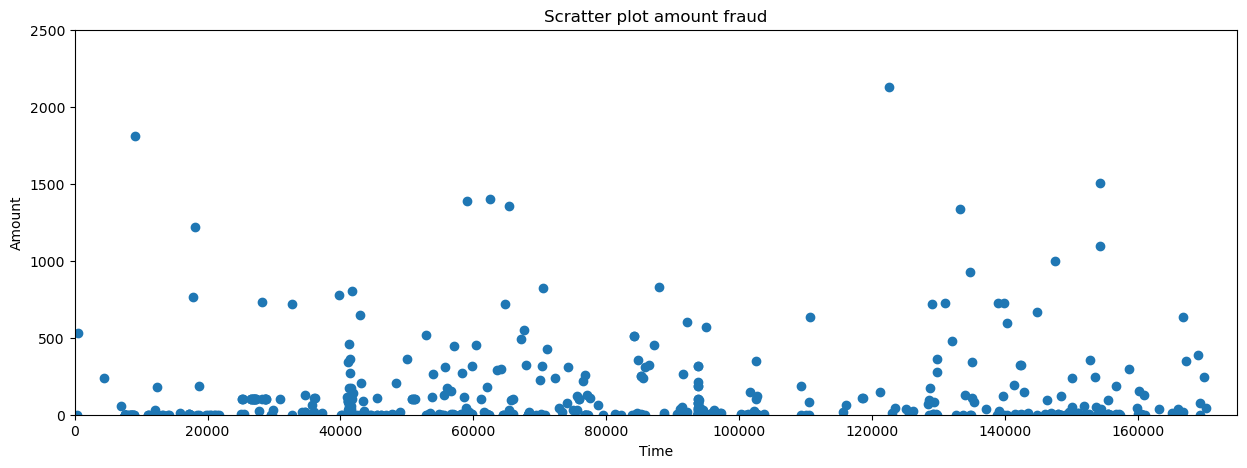

In [4]:
df_fraud = df[df['Class'] == 1] # Recovery of fraud data
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount']) # Display fraud amounts according to their time
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

We notice, first of all, the time doesn't impact the frequency of frauds. Moreover, the majority of frauds are small amounts. 

In [5]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0]                                                     
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds'.format(str(nb_big_fraud),str(df_fraud.shape[0]) ))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


# Checking for unbalanced or balanced data

In [6]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {}  frauds in the original dataset, even though there are {} no frauds in the dataset.'.format(str(number_fraud),str(number_no_fraud)))


There are only 492  frauds in the original dataset, even though there are 284315 no frauds in the dataset.


We can clearly see that the dataset is unbalanced here . This is because the n(frauds) <<<<<<<< n(no fraud) . Thus , the classifier might take very less or nothing of the no fraud class into the consideration .

This must be solved using resampling of the data .

In [16]:
print("The accuracy of the classifier then would be : {} which is the number of good classification over the number of tuple to classify".format(str((284315-492)/284315)))


The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


This problem can be solved using either the oversampling or the undersampling method. The undersampling principle should be used only if we are sure of the fact that the selected few tuples (non-fraud) completely represents the entire non-fraud class very well .

# Correlation of features

In [7]:
df_corr = df.corr() 

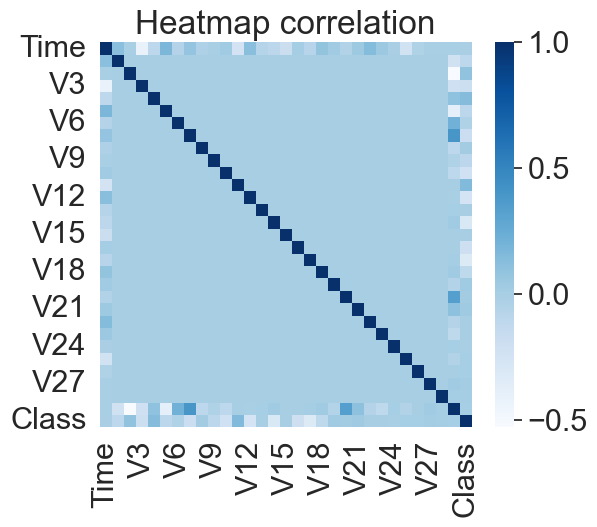

In [11]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='Blues') 
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()

From the above heat map we can easily conclude that there are very few correlated features in it . This waves or points towards the presence of a PCA being applied on this .

However in this case we were already aware of the fact that a PCA was previously performed.

If the dimension reduction is applied effectively then PCA isn't computed in the most effective way. Another way to say this is that no dimensionality reduction should be applied on a dataset on which a PCA was computed correctly.

# Resampling the data

This can be done in two ways :-

## OVERSAMPLING

One way to do oversampling is to replicate the under-represented class tuples until we attain a correct proportion between the class.

However as we don't have an infinite amount of time or the patience, we are going to run the classifier with the undersampled training data.

## UNDERSAMPLING

In [22]:
df_train_all = df[0:150000]  # Dividing the dataset into two parts
df_train_1 = df_train_all[df_train_all['Class'] == 1]  # Fraud
df_train_0 = df_train_all[df_train_all['Class'] == 0]  # Non Fraud
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample = df_train_0.sample(300)  # No Fraud
# Ensure columns of df_train_1 and df_sample match before appending
df_train = pd.concat([df_train_1, df_sample], axis=0, ignore_index=True)  # Concatenating the two DataFrames
df_train = df_train.sample(frac=1)  # Then we mix our dataset


In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [23]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features which are useless like Time ,the labels 
y_train = df_train['Class'] # Creating a target class
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [24]:
#with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

# Function of Confusion Matrix

In [25]:
class_names=np.array(['0','1']) # Binary label

In [26]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Applying the SVM

We use the SVM model classifier from the scikit-learn library.

# Training the model

In [27]:
classifier = svm.SVC(kernel='linear') 

In [28]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
prediction_SVM = classifier.predict(X_train)

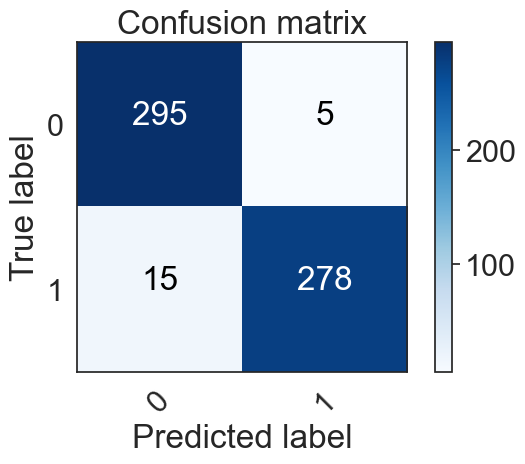

In [33]:
import itertools
cm = confusion_matrix(y_train, prediction_SVM)
plot_confusion_matrix(cm,class_names)

In [34]:
print('We have detected {} frauds / {} total frauds.'.format(str(cm[1][1]),str(cm[1][1]+cm[1][0])))
print('\nSo, the probability to detect a fraud is {}'.format(str(cm[1][1]/(cm[1][1]+cm[1][0]))))
print("the accuracy is : {}".format(str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])))))

We have detected 278 frauds / 293 total frauds.

So, the probability to detect a fraud is 0.9488054607508533
the accuracy is : 0.9662731871838112


# Testing the model

In [35]:
classifier = svm.SVC(kernel='linear') 

In [36]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [37]:
prediction_SVM_all = classifier.predict(X_test_all)

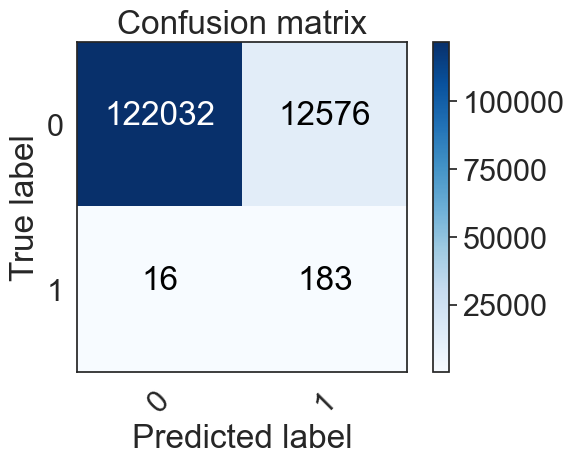

In [38]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
plot_confusion_matrix(cm,class_names)

In this case we are gonna try to minimize the number of errors in our prediction results. Errors are on the anti-diagonal of the confusion matrix. But we can infer that being wrong about an actual fraud is far worse than being wrong about a non-fraud transaction.

In [39]:
print('We have detected {} frauds / {} total frauds.'.format(str(cm[1][1]),str(cm[1][1]+cm[1][0])))
print('\nSo, the probability to detect a fraud is {}'.format(str(cm[1][1]/(cm[1][1]+cm[1][0]))))
print("the accuracy is : {}".format(str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1])))))

We have detected 183 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9195979899497487
the accuracy is : 0.9065923876356569


# Re-balancing the class weights :
In this previously used SVM model, the weigh of each class was the same, which means that missing a fraud is as bad as misjudging a non-fraud. The objective, for a bank, is to maximize the number of detected frauds! Even if it means considering more non-fraud tuple as fraudulent operation.

Thus, we need to minimize the False positives i.e, the number of non detected frauds.

Indeed, by modifying the class_weight parameter, we can chose which class to give more importance during the training phase. In this case, the class_1 which describes the fraudulent operations will be considered more important than the class_0 (non-fraud operation). However, in this case we will give more importance to the class_0 due to the large number of misclassed non-fraud operation. Of course the goal is to lose as little effective fraud as possible in the process.

In [40]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})

In [41]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='linear')

# Re-Testing the model

In [42]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.

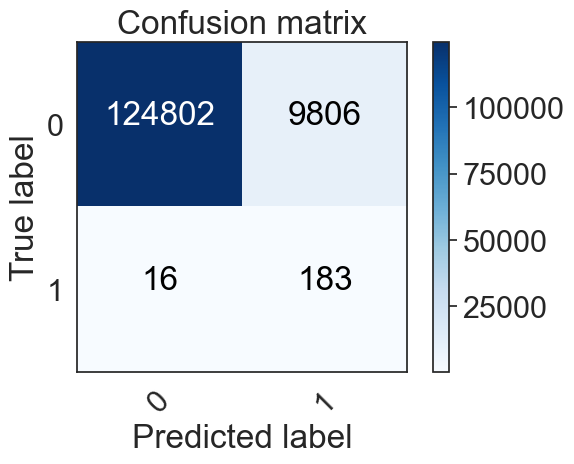

In [43]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [44]:
print('We have detected {} frauds / {} total frauds.'.format((cm[1][1]) ,(cm[1][1]+cm[1][0])))
print('Probability to detect a fraud is {}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : {} ".format((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 183 frauds / 199 total frauds.
Probability to detect a fraud is 0.9195979899497487
the accuracy is : 0.9271402820328322 


# Changing the Kernel
The SVM basically works in different kernels which are designed for different type of data distribution. By data distribution I mean how the data points are scattered along the hyperplane.

In other words, one can say that different kernels enables the SVM model to use different type of hyperplane on the dataset.

Thus, some of them are used below and the kernel which results in the minium error in the confusion matrix will be the bebst suited SVM kernel on the dataset. Hence, enabling the SVM algorithm to put it's best performance on the dataset.

# Polynomial Kernel

In [45]:
classifier_b = svm.SVC(kernel='poly',class_weight={0:0.60, 1:0.40})

In [46]:
classifier_b.fit(X_train, y_train)

SVC(class_weight={0: 0.6, 1: 0.4}, kernel='poly')

In [47]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) 

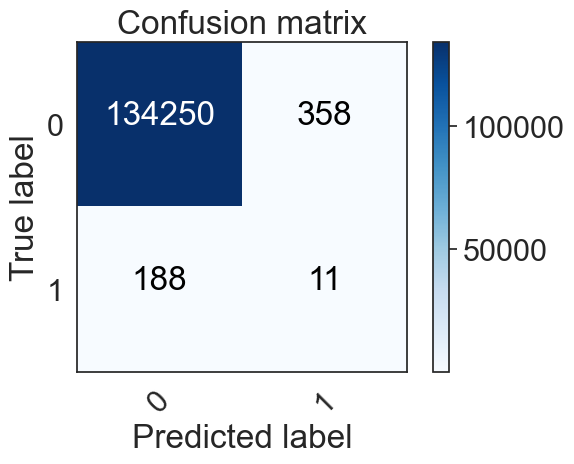

In [48]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [49]:
print('We have detected {} frauds / {} total frauds.'.format((cm[1][1]) ,(cm[1][1]+cm[1][0])))
print('Probability to detect a fraud is {}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : {} ".format((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 11 frauds / 199 total frauds.
Probability to detect a fraud is 0.05527638190954774
the accuracy is : 0.995949765219907 


# RBF(Radial basis function) Kernel 

In [50]:
classifier_b = svm.SVC(kernel='rbf',class_weight={0:0.60, 1:0.40})

In [51]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.

SVC(class_weight={0: 0.6, 1: 0.4})

In [52]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.

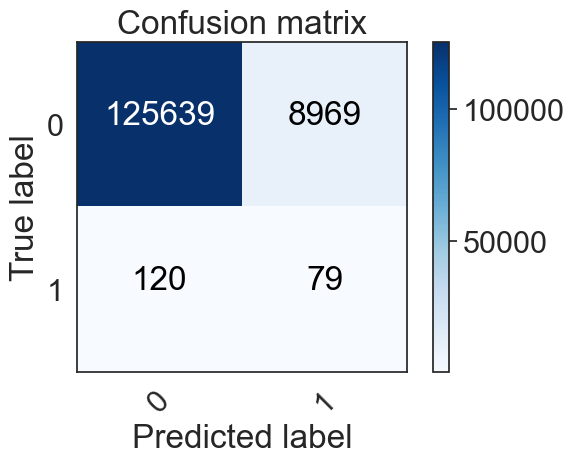

In [53]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [54]:
print('We have detected {} frauds / {} total frauds.'.format((cm[1][1]) ,(cm[1][1]+cm[1][0])))
print('Probability to detect a fraud is {}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : {} ".format((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 79 frauds / 199 total frauds.
Probability to detect a fraud is 0.3969849246231156
the accuracy is : 0.9325776851350449 


# Sigmoid Kernel

In [55]:
classifier_b = svm.SVC(kernel='sigmoid',class_weight={0:0.60, 1:0.40})

In [56]:
classifier_b.fit(X_train, y_train) # Then we train our model, with our balanced data train.


SVC(class_weight={0: 0.6, 1: 0.4}, kernel='sigmoid')

In [57]:
prediction_SVM_b_all = classifier_b.predict(X_test_all) #We predict all the data set.


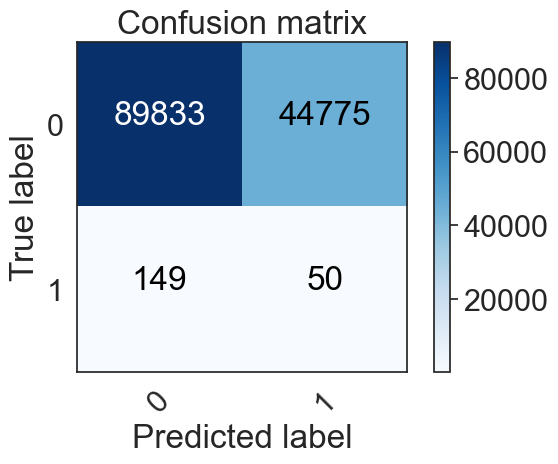

In [58]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm,class_names)

In [59]:
print('We have detected {} frauds / {} total frauds.'.format((cm[1][1]) ,(cm[1][1]+cm[1][0])))
print('Probability to detect a fraud is {}'.format(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : {} ".format((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 50 frauds / 199 total frauds.
Probability to detect a fraud is 0.25125628140703515
the accuracy is : 0.6667532101448738 


Hence, the observation is very clear as the polynomial kernel resulted in the highest accuracy amongst all the three kernels.

## Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error

In [60]:
from sklearn.metrics import classification_report,mean_absolute_error,mean_squared_error
report= classification_report(y_test_all, prediction_SVM_b_all)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80    134608
           1       0.00      0.25      0.00       199

    accuracy                           0.67    134807
   macro avg       0.50      0.46      0.40    134807
weighted avg       1.00      0.67      0.80    134807



In [61]:
mean_abs_error = mean_absolute_error(y_test_all,prediction_SVM_b_all)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - prediction_SVM_b_all) // y_test_all))
mse= mean_squared_error(y_test_all,prediction_SVM_b_all)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}".format(mean_abs_error,mean_abs_percentage_error,mse))

Mean absolute error : 0.33324678985512624 
Mean Absolute Percentage error : 0.0011052838502451654
Mean Squared Error : 0.33324678985512624


C:\Users\Aakash\AppData\Local\Temp\ipykernel_16460\3847849763.py:2: RuntimeWarning: divide by zero encountered in floor_divide
  mean_abs_percentage_error = np.mean(np.abs((y_test_all - prediction_SVM_b_all) // y_test_all))
